MODELLING

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.modeling import models, fitting
import scipy.optimize as opt

<ErrorbarContainer object of 3 artists>

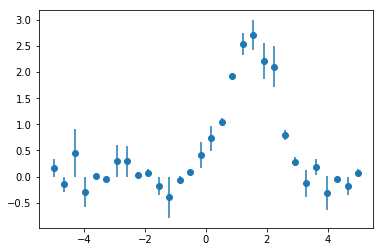

In [25]:
a=np.loadtxt('dataForFit.txt')
x=a[:,0];y=a[:,1];y_err=a[:,2]

plt.errorbar(x,y,yerr=y_err,marker='o',linestyle='None')

In [26]:
# con astropy
model=models.Gaussian1D()
fitter = fitting.LevMarLSQFitter()
best_fit_no_noise = fitter(model, x, y)
best_fit = fitter(model, x, y,weights=1/y_err**2)

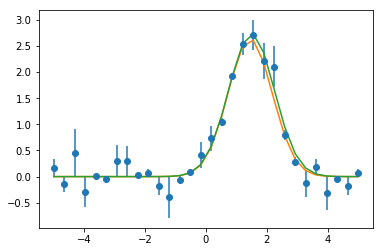

In [27]:
plt.errorbar(x,y, y_err,fmt='o')
plt.plot(x,best_fit(x),label='Astropy fit')
plt.plot(x,best_fit_no_noise(x),label='Astropy fit')

In [28]:
def calc_reduced_chi_square(fit, x, y, yerr, N, n_free):
    '''
    fit (array) values for the fit
    x,y,yerr (arrays) data
    N total number of points
    n_free number of parameters we are fitting
    '''
    return 1.0/(N-n_free)*sum(((fit - y)/yerr)**2)

In [29]:
chi2=calc_reduced_chi_square(best_fit(x),x,y,y_err,len(x),3)
chi2_sin_ruido=calc_reduced_chi_square(best_fit_no_noise(x),x,y,y_err,len(x),3)
print('chi2',chi2)
print('chi2 without noise',chi2_sin_ruido)

('chi2', 0.9628619334132468)
('chi2 without noise', 1.116277420960144)


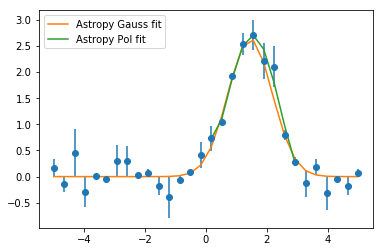

In [30]:
# con astropy probamos otro modelo 
#t_init = models.Trapezoid1D(amplitude=1., x_0=0., width=1., slope=0.5,bounds={"x_0": (-5., 5.)})
deg=5 # degree optimo
n_free=deg+1
model=models.Polynomial1D(degree=deg)
fitter = fitting.LevMarLSQFitter()
pos=np.where((x>0) & (x<3))[0]
best_fit_pol = fitter(model, x[pos], y[pos])#,weights=1./(y_err[pos]**2))
plt.errorbar(x,y, y_err,fmt='o')
plt.plot(x,best_fit(x),label='Astropy Gauss fit')
plt.plot(x[pos],best_fit_pol(x[pos]),label='Astropy Pol fit')
plt.legend()


In [31]:
chi2_pol=calc_reduced_chi_square(best_fit_pol(x[pos]),x[pos],y[pos],y_err[pos],len(x[pos]),n_free)
print('chi2 Gauss',chi2)
print('chi2 polynomidla',chi2_pol)

('chi2 Gauss', 0.9628619334132468)
('chi2 polynomidla', 1.7894008522120004)
